In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_json('dim_customer.json')

print(df)

       age first_name gender     id last_name
0     48.0   Nicholas      M      0    Flores
1      NaN    Jeffery      M      1      Rowe
2     57.0     Alexis      F      2    Benton
3     73.0        Amy      F      3   Johnson
4     20.0      David      M      4     Moore
...    ...        ...    ...    ...       ...
5186   NaN     Arthur      M   9428    Harris
5187   NaN      David      M   9494       Roy
5188  85.0     Thomas      M  10350    Turner
5189   NaN      April      F  10587   Sanchez
5190   NaN     Andrew      M  10934   Compton

[5191 rows x 5 columns]


In [4]:
import pandas as pd

df2 = pd.read_csv('fct_invoice.csv')

print(df2)

      invoice_no  customer_id         category  quantity    price  \
0        I138884          229         Clothing         5  1500.40   
1        I317333         3433            Shoes         3  1800.51   
2        I127801          644         Clothing         1   300.08   
3        I173702         4900            Shoes         5  3000.85   
4        I337046         1089            Books         4    60.60   
...          ...          ...              ...       ...      ...   
99452    I219422         2344         Souvenir         5    58.65   
99453    I325143          172  Food & Beverage         2    10.46   
99454    I824010          425  Food & Beverage         2    10.46   
99455    I702964          577       Technology         4  4200.00   
99456    I232867           30         Souvenir         3    35.19   

      payment_method invoice_date     shopping_mall  
0        Credit Card     5/8/2022            Kanyon  
1         Debit Card   12/12/2021    Forum Istanbul  
2        

EASY QUESTION #1: THERE ARE 5191 UNIQUE CUSTOMERS

In [11]:
#1
unique_customers = len(df['customer_id'].unique())

print(unique_customers)


5191


EASY QUESTION #2: THERE ARE 8 UNIQUE CATEGORIES

In [15]:
#2
unique_categories = df2['category'].nunique()

print(unique_categories)

8


EASY QUESTION #3: THE MOST COMMON METHOD IS CASH

In [16]:
commonpay = df2['payment_method'].mode()

print(commonpay)

0    Cash
Name: payment_method, dtype: object


MEDIUM QUESTION #1: The Top 3 are, from first to last, technology, books, then souvenirs

In [17]:
category_sales = df2.groupby('category')['quantity'].sum().reset_index()

sorted_categories = category_sales.sort_values(by='quantity')

top_three = sorted_categories.head(3)

print(top_three)

     category  quantity
5    Souvenir     14871
0       Books     14982
6  Technology     15021


MEDIUM QUESTION #2: THE TOTAL SALES TO CUSTOMERS ABOVE 45 IS 97629

In [30]:
df3 = pd.merge(df, df2, left_on='id', right_on='customer_id')

customers_45 = df3[df3['age'] > 45]

sales_over_45 = customers_45['quantity'].sum()
                       
print(sales_over_45)

97629


MEDIUM QUESTION #3:

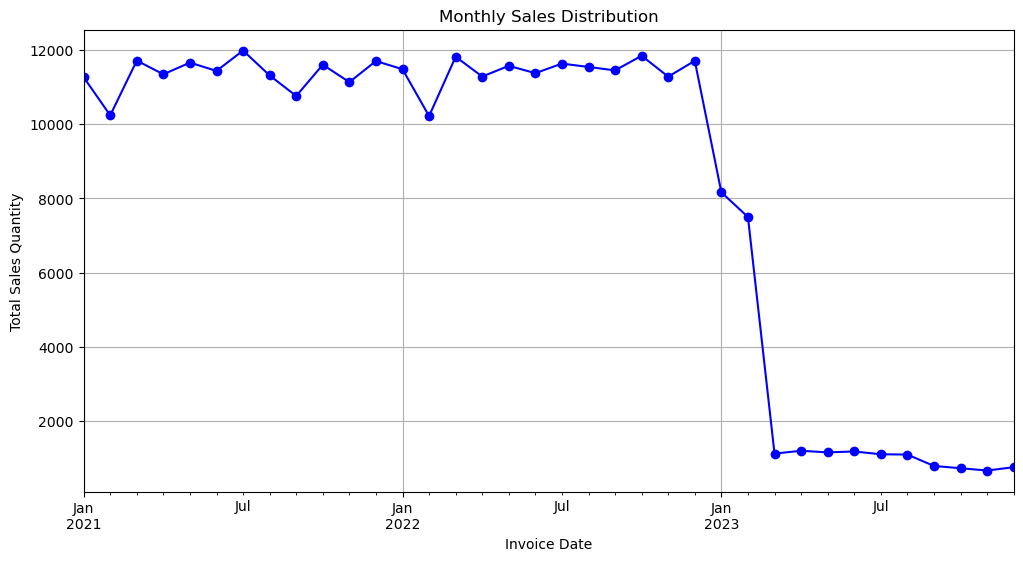

In [32]:
import matplotlib.pyplot as plt
df2['invoice_date'] = pd.to_datetime(df2['invoice_date'])

monthly_sales = df2.groupby(df2['invoice_date'].dt.to_period('M'))['quantity'].sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot(marker='o', linestyle='-', color='b')
plt.title('Monthly Sales Distribution')
plt.xlabel('Invoice Date')
plt.ylabel('Total Sales Quantity')
plt.grid(True)
plt.show()

HARD QUESTION #1:

In [36]:
age_bins = [0, 9, 19, 29, 39, 49, 59, 69, 79, 89, 100]
age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-100']

df['decade age range'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

df4 = pd.merge(df, df2, left_on='id', right_on='customer_id')

pivot_table = df4.pivot_table(index='category', columns='decade age range', values='quantity', aggfunc='sum', fill_value=0)

pivot_table = pivot_table.reindex(age_labels, axis=1)

print(pivot_table)

decade age range  0-9  10-19  20-29  30-39  40-49  50-59  60-69  70-79  80-89  \
category                                                                        
Books               0    137   1364   1567   1567   1311   1455   1071    547   
Clothing            0   1042   9105  10425  10398   9043  10032   7337   4397   
Cosmetics           0    445   3914   4914   4563   3816   4474   2967   1889   
Food & Beverage     0    484   3647   4569   4818   3778   4291   3029   1770   
Shoes               0    279   2566   3249   3203   2622   2752   2102   1279   
Souvenir            0    141   1285   1502   1553   1280   1363    904    621   
Technology          0    176   1309   1611   1593   1164   1447    977    571   
Toys                0    286   2727   3244   3111   2520   2863   2218   1272   

decade age range  90-100  
category                  
Books                  0  
Clothing               0  
Cosmetics              0  
Food & Beverage        0  
Shoes                  0  
